#  An Individual's Likelihood on Making Over/Under $50K Based on Categorical Features

In [2]:
# Importing Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Data Cleaning and Preparation

A portion of the data cleaning/preparation process involved converting the data into a csv file.<br>

For this project, we'll be using the education, race, income features to evaluate if race and education level significantly effects an individual's likelihood of earning over or under $50,000 per year.<br>

Below is a filtered version of the census dataset that only includes the filtered feature columns.<br>

In [19]:
# Reading in the census csv as a dataframe
census = pd.read_csv('census.csv', usecols=['income','education','race','marital-status'])

# The strip function was used because there was an extra white space in the feature columns
census['race'] = census['race'].str.strip()
census['income'] =  census['income'].str.strip()
census['education'] = census['education'].str.strip()
census['marital-status'] =  census['marital-status'].str.strip()

census

,education,marital-status,race,income
0,Bachelors,Married-civ-spouse,White,<=50K
1,HS-grad,Divorced,White,<=50K
2,11th,Married-civ-spouse,Black,<=50K
3,Bachelors,Married-civ-spouse,Black,<=50K
4,Masters,Married-civ-spouse,White,<=50K
...,...,...,...,...
32555,Assoc-acdm,Married-civ-spouse,White,<=50K
32556,HS-grad,Married-civ-spouse,White,>50K
32557,HS-grad,Widowed,White,<=50K
32558,HS-grad,Never-married,White,<=50K


## Exploratory Data Analysis

Immediately, we notice that there are far more observations for white individuals than any other race in the dataset. <br>

Therefore, we'll take a random sample of 150 individuals from each race to fairly conduct our statistical analysis.

In [20]:
census['race'].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [21]:
census.describe()

,education,marital-status,race,income
count,32560,32560,32560,32560
unique,16,7,5,2
top,HS-grad,Married-civ-spouse,White,<=50K
freq,10501,14976,27815,24719


In [22]:
# Gathering Sample Data by Race

# Replace parameter is used to ensure all 150 samples are unique. Random seed is set for reproducibility.
np.random.seed(0)

white_sample = census[census['race'] == 'White'].sample(n=150, replace=False)
black_sample = census[census['race'] == 'Black'].sample(n=150, replace=False)
asian_sample = census[census['race'] == 'Asian-Pac-Islander'].sample(n=150, replace=False)
indian_sample = census[census['race'] == 'Amer-Indian-Eskimo'].sample(n=150, replace=False)

sample_dataframe = pd.concat([white_sample,black_sample,
                              asian_sample,indian_sample])

sample_dataframe

,education,marital-status,race,income
9720,Masters,Divorced,White,<=50K
1681,Bachelors,Married-civ-spouse,White,>50K
24467,9th,Widowed,White,<=50K
19847,Some-college,Separated,White,<=50K
14468,Masters,Divorced,White,<=50K
...,...,...,...,...
19758,HS-grad,Never-married,Amer-Indian-Eskimo,<=50K
17780,Doctorate,Married-spouse-absent,Amer-Indian-Eskimo,<=50K
19136,HS-grad,Separated,Amer-Indian-Eskimo,<=50K
30578,11th,Never-married,Amer-Indian-Eskimo,<=50K


In [23]:
sample_dataframe.describe()

,education,marital-status,race,income
count,600,600,600,600
unique,16,6,4,2
top,HS-grad,Married-civ-spouse,White,<=50K
freq,180,266,150,469


## Model Selection and Analysis

Before conducting data visualizations on the samples from the census population, we'll first declare a null and alternative hypotheis followed by a Pearson's chi-squared test for independence.  <br><br>
$H_0$: There is no relation between the categorical feature and income.<br>
$H_\alpha$ : There is a relation between the categorical feature and income. <br>

It is important to note that we will be conducting the chi-squared test with income and one categorical feature at a time. We are not testing the relationship between income and all categorical features simulatenously.

We will verify our hypothesis using: p-value

### Chi-Square Test

In [24]:
# Setting our P-value/significance level
significance_level = 0.05

# Education + Income Crosstab
ed_income_cross = pd.crosstab(sample_dataframe["education"],sample_dataframe["income"])

# Race + Income Crosstab
race_income_cross = pd.crosstab(sample_dataframe["race"],sample_dataframe["income"])

# Marital Status + Income Crosstab
marital_income_cross = pd.crosstab(sample_dataframe["marital-status"],sample_dataframe["income"])


In [25]:
# Printing out contingency tables

# Education Contingency Table
print("Education: \n", ed_income_cross)

Education: 
 income        <=50K  >50K
education                
10th             18     0
11th             22     2
12th              9     0
1st-4th           4     0
5th-6th           6     0
7th-8th          12     0
9th               9     0
Assoc-acdm       18     5
Assoc-voc        22    10
Bachelors        51    45
Doctorate         3     3
HS-grad         161    19
Masters          11    17
Preschool         1     0
Prof-school       2     9
Some-college    120    21


In [26]:
# Race Contingency Table
print("Race: \n", race_income_cross)

Race: 
 income              <=50K  >50K
race                           
Amer-Indian-Eskimo    133    17
Asian-Pac-Islander    105    45
Black                 125    25
White                 106    44


In [27]:
# Marital Contingency Table
print("Marital: \n", marital_income_cross)

Marital: 
 income                 <=50K  >50K
marital-status                    
Divorced                  74     4
Married-civ-spouse       151   115
Married-spouse-absent     10     1
Never-married            183     8
Separated                 32     2
Widowed                   19     1


In [28]:
# Chi-Square Test for Education

chi2_stat, p, dof, expected = stats.chi2_contingency(ed_income_cross)

print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")

if p <= significance_level: 
    print('Reject null hypothesis') 
else: 
    print('Fail to reject null hypothesis')

p-value: 2.944e-19
degrees of freedom: 15
Reject null hypothesis


In [29]:
# Chi-Square Test for Race

chi2_stat,p, dof, expected = stats.chi2_contingency(race_income_cross)

print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")

if p <= significance_level: 
    print('Reject null hypothesis') 
else: 
    print('Fail to reject null hypothesis')

p-value: 4.356e-05
degrees of freedom: 3
Reject null hypothesis


In [30]:
# Chi-Square Test for Marital Status 

chi2_stat,p, dof, expected = stats.chi2_contingency(marital_income_cross)

print(f"p-value: {p:.5g}")
print(f"degrees of freedom: {dof}")

if p <= significance_level: 
    print('Reject null hypothesis') 
else: 
    print('Fail to reject null hypothesis')

p-value: 5.1726e-26
degrees of freedom: 5
Reject null hypothesis


Since all of the P-values fall below our significance level of 0.05, we reject the null hypothesis. The sample data favors the alternative hypothesis, which suggests that the relationship exists in the population. 

### Data Visualization

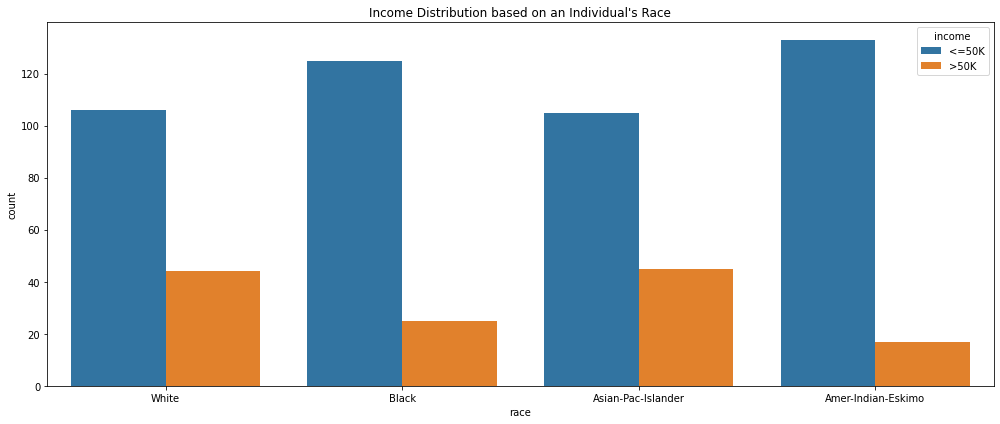

In [31]:
# Bar plot for income distribution by race
plt.figure(figsize=(14, 6))
sns.countplot(x='race', hue='income', 
              data=sample_dataframe, order=sample_dataframe['race'].value_counts().index)
plt.title("Income Distribution based on an Individual's Race")
plt.tight_layout()
plt.show()

The plot titled “Income Distribution based on an Individual's Race” provides a clear visual representation of how income distribution varies across different racial groups. The most evident trend from this sample data is that across all racial groups, there are more individuals in the "<=50K" income bracket than in the ">50K" bracket.

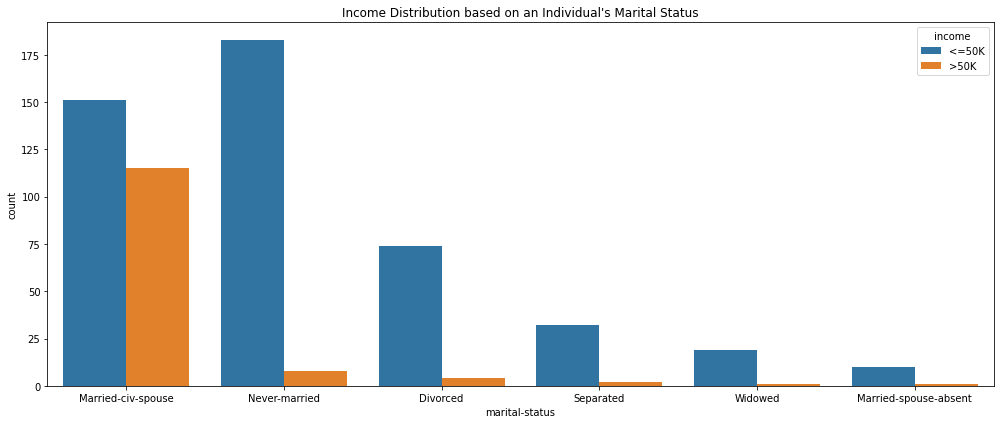

In [32]:
# Bar plot for income distribution by  marital status
plt.figure(figsize=(14, 6))
sns.countplot(x='marital-status', hue='income', 
              data=sample_dataframe, order=sample_dataframe['marital-status'].value_counts().index)
plt.title("Income Distribution based on an Individual's Marital Status")
plt.tight_layout()
plt.show()

The plot titled "Income Distribution based on an Individual's Marital Status" is a bar plot that illustrates the count of individuals within different income brackets, further segmented by their marital status. One noticeable trend is that the "Never-married" and "Married-civ-spouse" categories have the most substantial counts. For the "Never-married" group, a majority earn less than 50K, while the "Married-civ-spouse" group has a more balanced distribution between the two income brackets.

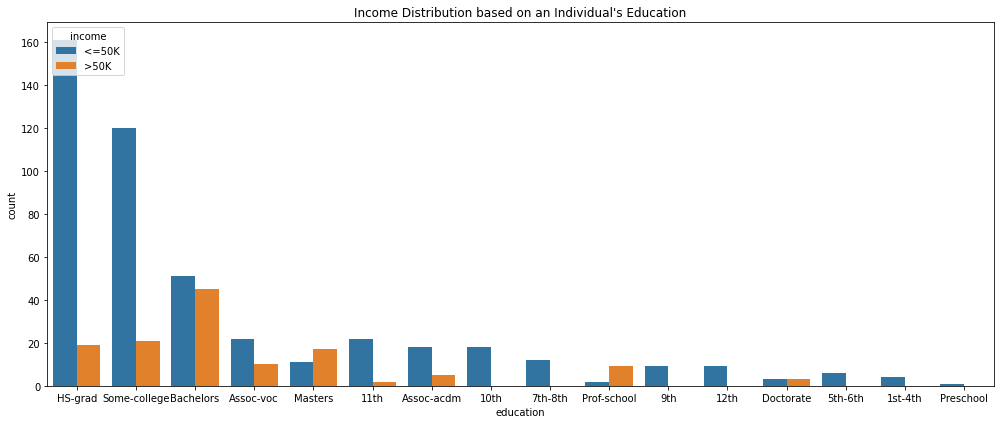

In [33]:
# Bar plot for income distribution by education
plt.figure(figsize=(14, 6))
sns.countplot(x='education', hue='income', 
              data=sample_dataframe, order=sample_dataframe['education'].value_counts().index)
plt.title("Income Distribution based on an Individual's Education")
plt.tight_layout()
plt.show()

The plot titled "Income Distribution based on an Individual's Education" is a bar plot that displays the number of individuals within two income brackets, categorized by their educational attainment. A notable trend is that as the education level increases, the probability of earning ">50K" also seems to increase. However, the largest categories by count are "HS-grad" and "Some-college," indicating that these are the most common education levels in the dataset.